### Importação dos dados



In [4]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


Média de Avaliação - Loja 1: R$ 1534509.12
Média de Avaliação - Loja 1: R$ 1488459.06
Média de Avaliação - Loja 1: R$ 1464025.03
Média de Avaliação - Loja 1: R$ 1384497.58


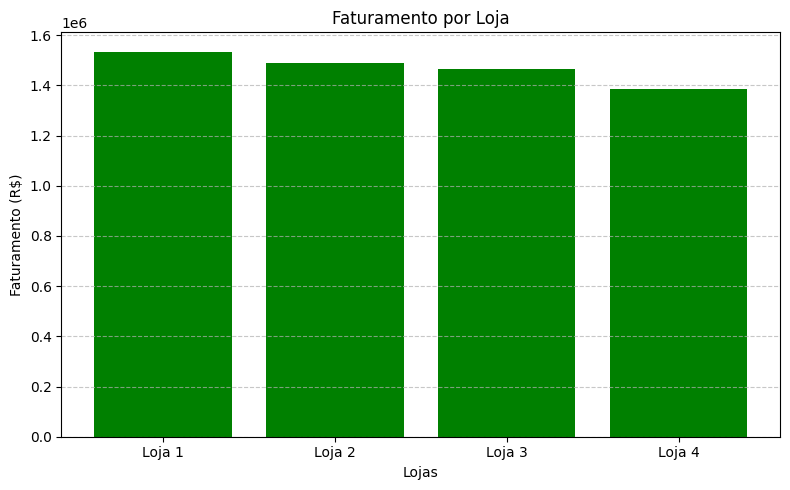

In [28]:
import matplotlib.pyplot as plt


faturamento_loja1 = loja["Preço"].sum()
faturamento_loja2 = loja2["Preço"].sum()
faturamento_loja3 = loja3["Preço"].sum()
faturamento_loja4 = loja4["Preço"].sum()

print(f"Média de Avaliação - Loja 1: R$ {round( faturamento_loja1, 2)}")
print(f"Média de Avaliação - Loja 1: R$ {round( faturamento_loja2, 2)}")
print(f"Média de Avaliação - Loja 1: R$ {round(faturamento_loja3, 2)}")
print(f"Média de Avaliação - Loja 1: R$ {round(faturamento_loja4, 2)}")


lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
faturamentos = [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]


plt.figure(figsize=(8, 5))
plt.bar(lojas, faturamentos, color='green')
plt.title("Faturamento por Loja")
plt.xlabel("Lojas")
plt.ylabel("Faturamento (R$)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 2. Vendas por Categoria


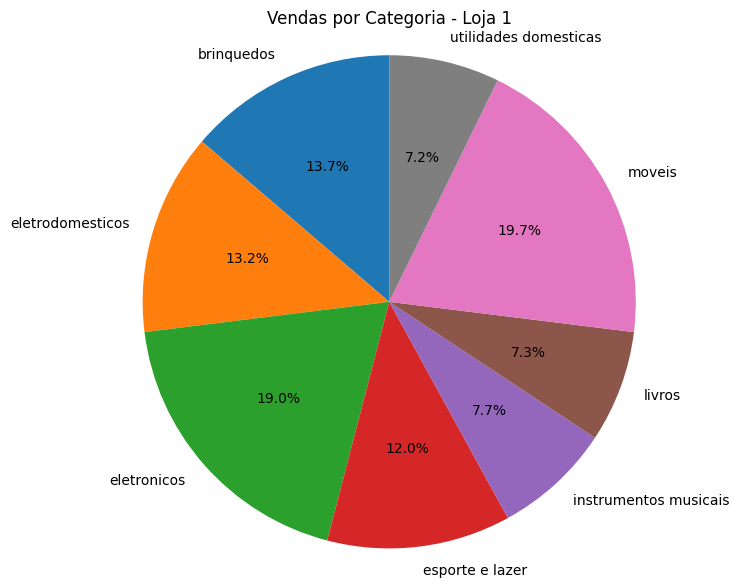

Vendas por Categoria - Loja 1:
brinquedos: 324
eletrodomesticos: 312
eletronicos: 448
esporte e lazer: 284
instrumentos musicais: 182
livros: 173
moveis: 465
utilidades domesticas: 171



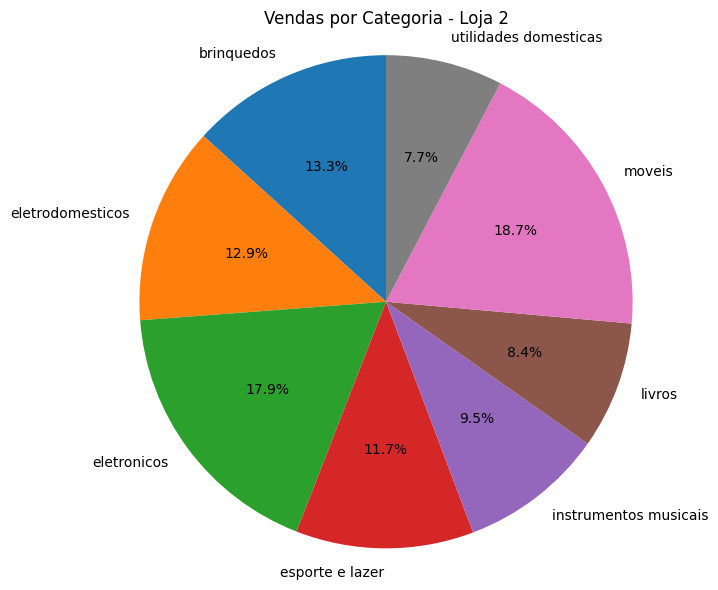

Vendas por Categoria - Loja 2:
brinquedos: 313
eletrodomesticos: 305
eletronicos: 422
esporte e lazer: 275
instrumentos musicais: 224
livros: 197
moveis: 442
utilidades domesticas: 181



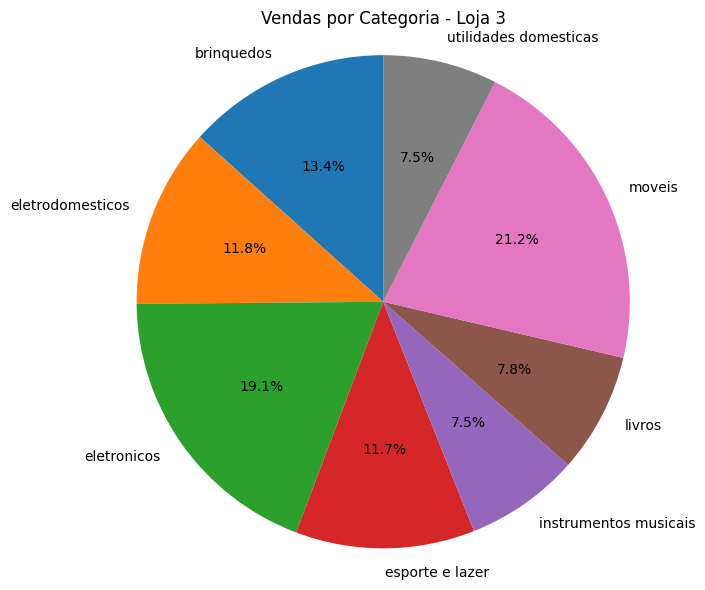

Vendas por Categoria - Loja 3:
brinquedos: 315
eletrodomesticos: 278
eletronicos: 451
esporte e lazer: 277
instrumentos musicais: 177
livros: 185
moveis: 499
utilidades domesticas: 177



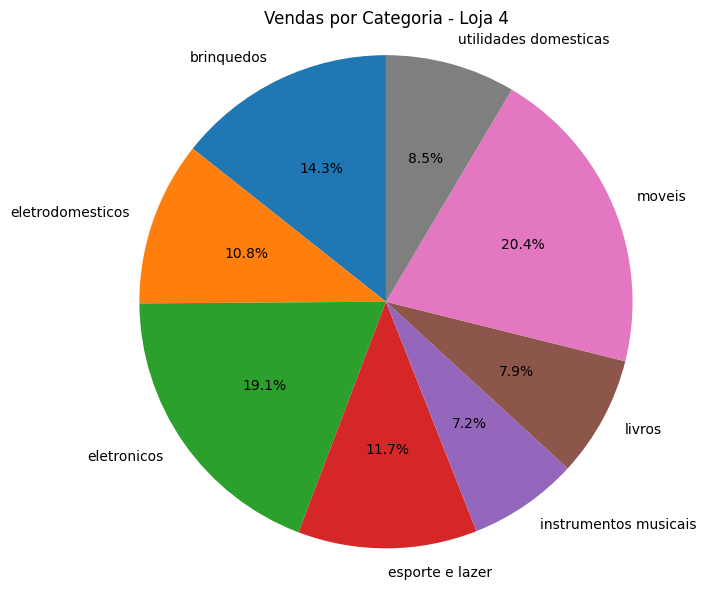

Vendas por Categoria - Loja 4:
brinquedos: 338
eletrodomesticos: 254
eletronicos: 451
esporte e lazer: 277
instrumentos musicais: 170
livros: 187
moveis: 480
utilidades domesticas: 201



In [36]:
import matplotlib.pyplot as plt
import numpy as np

lojas = [loja, loja2, loja3, loja4]
lojas_id = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

vendas_por_categoria_loja = {}

for loja_id, dados_loja in zip(lojas_id, lojas):
    contagem_categorias = (
        dados_loja
        .groupby('Categoria do Produto')['Produto']
        .count()
        .to_dict()
    )
    vendas_por_categoria_loja[loja_id] = contagem_categorias

categorias = list(vendas_por_categoria_loja['Loja 1'].keys())

valores = []
for loja_id in lojas_id:
    valores.append([vendas_por_categoria_loja[loja_id].get(cat, 0) for cat in categorias])

valores = np.array(valores).T


for i, loja_id in enumerate(lojas_id):
    contagem_categorias = vendas_por_categoria_loja[loja_id]
    categorias = list(contagem_categorias.keys())
    vendas = list(contagem_categorias.values())

    plt.figure(figsize=(7, 7))
    plt.pie(vendas, labels=categorias, autopct='%1.1f%%', startangle=90)
    plt.title(f'Vendas por Categoria - {loja_id}')
    plt.axis('equal')
    plt.show()


    print(f"Vendas por Categoria - {loja_id}:")
    for categoria, vendas in contagem_categorias.items():
        print(f"{categoria}: {vendas}")
    print()


# 3. Média de Avaliação das Lojas

In [17]:
def media(lista):
    return sum(lista) / len(lista)

media_loja1 = media(loja['Avaliação da compra'])
media_loja2 = media(loja2['Avaliação da compra'])
media_loja3 = media(loja3['Avaliação da compra'])
media_loja4 = media(loja4['Avaliação da compra'])


print(f"Média de Avaliação - Loja 1: {round(media_loja1, 2)}")
print(f"Média de Avaliação - Loja 2: {round(media_loja2, 2)}")
print(f"Média de Avaliação - Loja 3: {round(media_loja3, 2)}")
print(f"Média de Avaliação - Loja 4: {round(media_loja4, 2)}")

Média de Avaliação - Loja 1: 3.98
Média de Avaliação - Loja 2: 4.04
Média de Avaliação - Loja 3: 4.05
Média de Avaliação - Loja 4: 4.0


# 4. Produtos Mais e Menos Vendidos

In [11]:
def produtos_mais_menos_vendidos(dados_loja):
  contagem_produtos = dados_loja.groupby('Produto')['Produto'].count()
  mais_vendido = contagem_produtos.idxmax()
  menos_vendido = contagem_produtos.idxmin()
  return mais_vendido, contagem_produtos[mais_vendido], menos_vendido, contagem_produtos[menos_vendido]


resultados_loja1 = produtos_mais_menos_vendidos(loja)
resultados_loja2 = produtos_mais_menos_vendidos(loja2)
resultados_loja3 = produtos_mais_menos_vendidos(loja3)
resultados_loja4 = produtos_mais_menos_vendidos(loja4)


print(f"Loja 1 - Produto Mais Vendido: {resultados_loja1[0]} ({resultados_loja1[1]} vendas), Produto Menos Vendido: {resultados_loja1[2]} ({resultados_loja1[3]} vendas)")
print(f"Loja 2 - Produto Mais Vendido: {resultados_loja2[0]} ({resultados_loja2[1]} vendas), Produto Menos Vendido: {resultados_loja2[2]} ({resultados_loja2[3]} vendas)")
print(f"Loja 3 - Produto Mais Vendido: {resultados_loja3[0]} ({resultados_loja3[1]} vendas), Produto Menos Vendido: {resultados_loja3[2]} ({resultados_loja3[3]} vendas)")
print(f"Loja 4 - Produto Mais Vendido: {resultados_loja4[0]} ({resultados_loja4[1]} vendas), Produto Menos Vendido: {resultados_loja4[2]} ({resultados_loja4[3]} vendas)")


Loja 1 - Produto Mais Vendido: Guarda roupas (60 vendas), Produto Menos Vendido: Celular ABXY (33 vendas)
Loja 2 - Produto Mais Vendido: Iniciando em programação (65 vendas), Produto Menos Vendido: Jogo de tabuleiro (32 vendas)
Loja 3 - Produto Mais Vendido: Kit banquetas (57 vendas), Produto Menos Vendido: Blocos de montar (35 vendas)
Loja 4 - Produto Mais Vendido: Cama box (62 vendas), Produto Menos Vendido: Guitarra (33 vendas)


# 5. Frete Médio por Loja


Frete Médio - Loja 1: R$ 34.69
Frete Médio - Loja 2: R$ 33.62
Frete Médio - Loja 3: R$ 33.07
Frete Médio - Loja 4: R$ 31.28


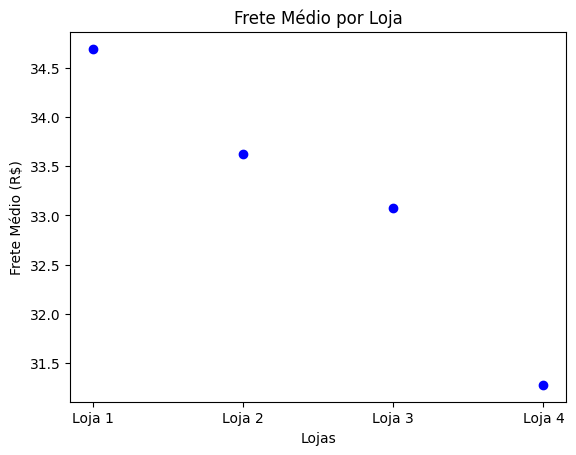

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

frete_medio_loja1 = loja['Frete'].mean()
frete_medio_loja2 = loja2['Frete'].mean()
frete_medio_loja3 = loja3['Frete'].mean()
frete_medio_loja4 = loja4['Frete'].mean()

print(f"Frete Médio - Loja 1: R$ {frete_medio_loja1:.2f}")
print(f"Frete Médio - Loja 2: R$ {frete_medio_loja2:.2f}")
print(f"Frete Médio - Loja 3: R$ {frete_medio_loja3:.2f}")
print(f"Frete Médio - Loja 4: R$ {frete_medio_loja4:.2f}")


lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
fretes = [frete_medio_loja1, frete_medio_loja2, frete_medio_loja3, frete_medio_loja4]


plt.scatter(lojas, fretes, color='blue')
plt.title('Frete Médio por Loja')
plt.xlabel('Lojas')
plt.ylabel('Frete Médio (R$)')
plt.show()

## Relatório

# Relatório de Análise de Desempenho das Lojas

O objetivo desta análise é identificar qual das quatro lojas deve ser vendida, com base em dados de desempenho. Foram avaliados: faturamento, vendas por categoria, avaliação dos clientes, produtos mais e menos vendidos e frete médio. Três gráficos foram criados para apoiar a visualização dos resultados.

---

## Indicadores Avaliados

Foram analisados os seguintes pontos:

- **Faturamento**  
- **Vendas por categoria**  
- **Avaliações dos clientes**  
- **Produtos mais e menos vendidos**  
- **Frete médio**

## Gráficos de Apoio

Para facilitar a visualização dos dados, foram criados três gráficos principais:

1. Gráfico de barras com o faturamento total de cada loja.  
2. Gráficos de vendas por categorias, comparando o desempenho dos produtos entre as unidades.  
3. Gráfico do frete médio por loja, destacando os custos logísticos.

## Análise do Desempenho

A Loja 4 se destacou negativamente em praticamente todos os aspectos avaliados:

- Teve o menor faturamento entre as unidades: R$ 1.384.497,58.  
- Sua avaliação média foi de 4.00, a segunda pior.  
- Não apresentou bom desempenho em nenhuma categoria específica ou produto.  
- Embora tenha o frete médio mais barato de 31,28 reais, isso não foi suficiente para compensar os outros pontos fracos.

## Considerações Finais

Diante dos dados, é possível afirmar que a Loja 4 apresenta o pior desempenho geral da rede. Por esse motivo, ela se mostra como a mais indicada para ser vendida.
